### Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset

In [2]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


# Performing Exploratory Data Analysis

In [5]:
data.shape

(48204, 9)

The dataset has 48204 rows and 9 columns totally

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### Inference :
         There are 5 Numerical columns in the dataset out of that 3 columns have decimal values
         There are 4 Categorical columns in the dataset 

In [7]:
data.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

There is no null values in the dataset

In [8]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


The mean and median of all the columns will make us to get to know about the skewness.
#####  As we know  when  :
          mean > median the data is right skewed which indicates most of the values are at right side and outliers might present at the left side on the normal distribution curve.
          mean < median vice versa.
          
In this cases there is no big variation in the mean and median. Outliers have to be analysed.

##  Correlation Plot

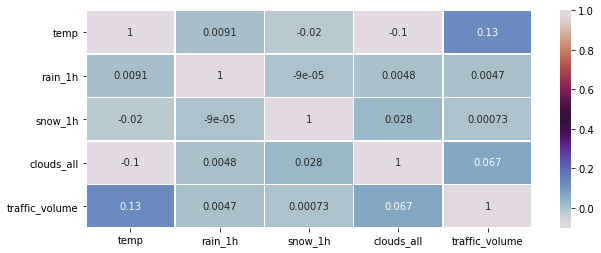

In [9]:
corr = data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='twilight')
plt.show()

From correlation plot we can say that all the columns positively correlated with output variable traffic_volume.
But they are not strongly correlated.

## Visualizing the Numerical Categories

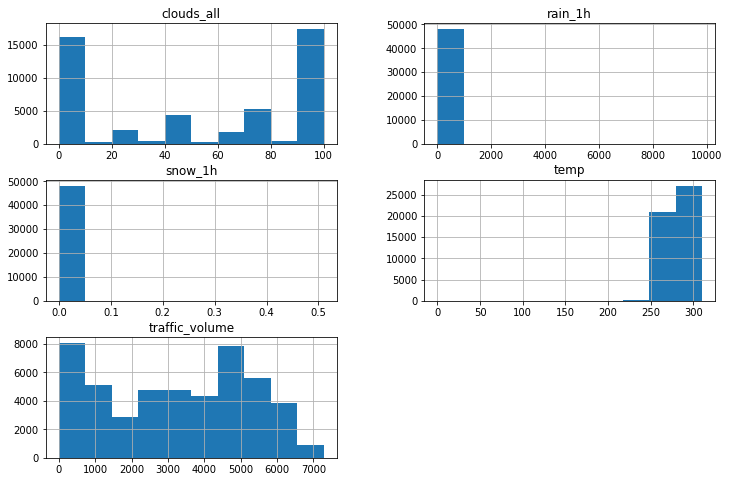

In [10]:
data.hist(figsize=(12,8))
plt.show()

##### We can see all the numerical categories and their values range in the histogram plot.
        In clouds_all column more values are in the range 90-100 and 0-10.
        In rain_1h and snow_1h are having low decimal values and in range 0 -5 and 0.0-0.05 respectively.
        In temp columns the minimum value is around 220 and maximum value is 310 and have good distribution in 250 -310.
        In traffic_volume column the data is well distributed throughout the range.

# Outlier Detection

Applying Scatter Plot for numerical variables

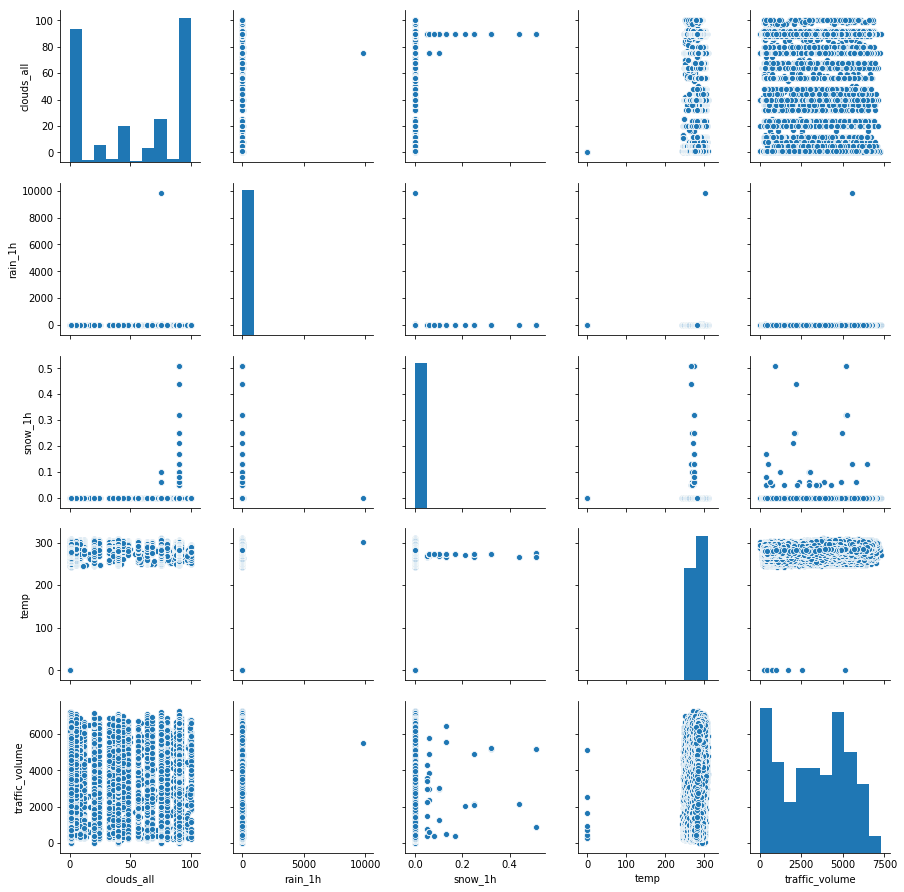

In [11]:
cols =['clouds_all','rain_1h','snow_1h','temp','traffic_volume']
sns.pairplot(data[cols])
plt.show()

Applying box plot for all the numeric values 

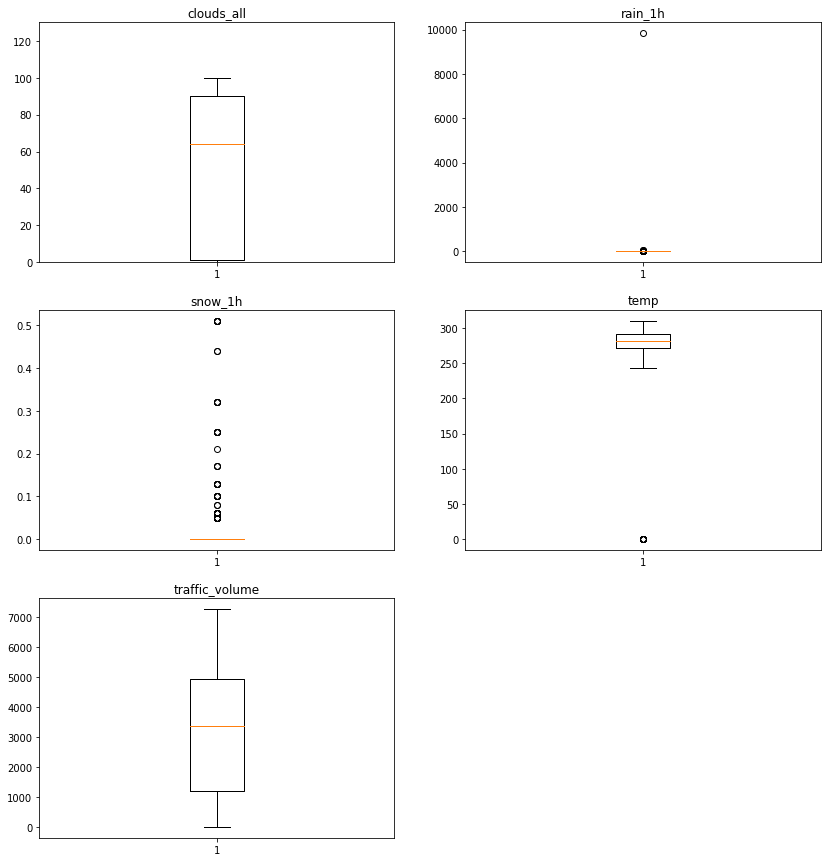

In [12]:
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(data['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(data['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(data['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(data['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(data['traffic_volume'])
plt.title('traffic_volume')

plt.show()

From the Scatter Plot and Box Plot We can say there are outliers in the columns 'rain_1h' and 'temp' . Now we have to check whether its valid one or not.
wheares 'snow_1h' values are spread throughout the range.

In [13]:
# rain_1h column
data[(data['rain_1h'] == data['rain_1h'].max())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
24872,None,302.11,9831.3,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535


By extracting the whole row we can say the data is valid. since it comes under very heavy rain. but we need to compare it with the other records which has 'very heavy rain'.

In [14]:
data[(data['weather_description']=='very heavy rain')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
7133,None,291.76,16.38,0.0,76,Rain,very heavy rain,2013-06-22 05:00:00,635
7179,None,295.82,44.45,0.0,76,Rain,very heavy rain,2013-06-24 11:00:00,4802
7664,None,292.82,19.90,0.0,20,Rain,very heavy rain,2013-07-14 05:00:00,542
7667,None,292.65,25.32,0.0,8,Rain,very heavy rain,2013-07-14 06:00:00,958
7670,None,292.87,21.42,0.0,90,Rain,very heavy rain,2013-07-14 07:00:00,1745
8247,None,289.10,55.63,0.0,68,Rain,very heavy rain,2013-08-07 02:00:00,315
10734,None,262.65,18.80,0.0,64,Rain,very heavy rain,2013-12-16 19:00:00,2755
10806,None,264.50,28.70,0.0,64,Rain,very heavy rain,2013-12-19 23:00:00,1190
14853,None,298.21,18.03,0.0,0,Rain,very heavy rain,2014-06-02 16:00:00,6443
16300,None,294.87,23.80,0.0,90,Rain,very heavy rain,2015-07-06 03:00:00,346


we can conclude that the data is an outlier or an type error when compared with the other relative data.
data with clouds_all having higher value than this has less rain_1h. So it has to be handeled or dropped.

In [15]:
# temp column
data[(data['temp'] == data['temp'].min())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670


In temperature column the values are zero for particular occurance and the time is also continuous .So it might be due to the temperature would not have been noted and filled as zero. We need to fill it with relative values

# Handling Outliers

 rain1h column

In [16]:
med_val = data['rain_1h'][(data['weather_description']=='very heavy rain') & (data['traffic_volume'] > 4000)].median()

In [17]:
data['rain_1h'][data['rain_1h'] == data['rain_1h'].max()] = med_val

## Extracting month and year from the date column to get more information about the data

In [18]:
import calendar
from datetime import datetime

In [19]:
data['Year']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').year for i in data['date_time']]
data['Month'] = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').month for i in data['date_time']]
data['Day']   = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').day for i in data['date_time']]
data['Hour']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').hour for i in data['date_time']]

Outlier handling for Temp column 

In [20]:
data[data['temp'] == 0.0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361,2014,1,31,3
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734,2014,1,31,4
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557,2014,1,31,5
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150,2014,1,31,6
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291,2014,2,2,3
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284,2014,2,2,4
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434,2014,2,2,5
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739,2014,2,2,6
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962,2014,2,2,7
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670,2014,2,2,8


Two month and two days having the values zero in the temp column. So extracting it detaily.

In [21]:
data[(data['Year'] == 2014) & (data['Month'] == 1 ) & (data['Day'] == 31)].head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
11895,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 00:00:00,644,2014,1,31,0
11896,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 01:00:00,390,2014,1,31,1
11897,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 02:00:00,313,2014,1,31,2
11898,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361,2014,1,31,3
11899,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734,2014,1,31,4
11900,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557,2014,1,31,5
11901,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150,2014,1,31,6
11902,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 07:00:00,5363,2014,1,31,7
11903,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 08:00:00,5269,2014,1,31,8
11904,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 09:00:00,4721,2014,1,31,9


We can see the temp has been constant from the hour 0 - 9 so we are replacing the zero temperatures with 255.93

In [22]:
data['temp'][(data['Day'] == 31) & (data['temp'] == 0.0)] = 255.93

In [23]:
data[(data['Year'] == 2014) & (data['Month'] == 2 ) & (data['Day'] == 2)].head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
11943,None,255.59,0.0,0.0,0,Clear,sky is clear,2014-02-02 00:00:00,1143,2014,2,2,0
11944,None,255.48,0.0,0.0,0,Clear,sky is clear,2014-02-02 01:00:00,695,2014,2,2,1
11945,None,255.37,0.0,0.0,0,Clear,sky is clear,2014-02-02 02:00:00,539,2014,2,2,2
11946,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291,2014,2,2,3
11947,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284,2014,2,2,4
11948,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434,2014,2,2,5
11949,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739,2014,2,2,6
11950,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962,2014,2,2,7
11951,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670,2014,2,2,8
11952,None,255.62,0.0,0.0,0,Clear,sky is clear,2014-02-02 09:00:00,2506,2014,2,2,9


There is an incremental fashion in the temp for the month 2. so we have to replace the values of zero in the same manner

In [24]:
np.round(np.linspace(255.41,255.62,6,endpoint=False),2)

array([255.41, 255.44, 255.48, 255.52, 255.55, 255.58])

In [25]:
data['temp'][data['temp'] == 0] = [i for i in np.round(np.linspace(255.41,255.62,6,endpoint=False),2)]

In [26]:
data.drop('date_time',axis=1,inplace=True)

In [27]:
data = data[['holiday','temp','rain_1h','snow_1h','Year','Month','Day','Hour','weather_main','weather_description','traffic_volume']]

In [28]:
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,None,288.28,0.0,0.0,2012,10,2,9,Clouds,scattered clouds,5545
1,None,289.36,0.0,0.0,2012,10,2,10,Clouds,broken clouds,4516
2,None,289.58,0.0,0.0,2012,10,2,11,Clouds,overcast clouds,4767
3,None,290.13,0.0,0.0,2012,10,2,12,Clouds,overcast clouds,5026
4,None,291.14,0.0,0.0,2012,10,2,13,Clouds,broken clouds,4918


Saving it as csv for furthur usage

In [29]:
data.to_csv('Metro-Interstate-Traffic-Volume.csv',header=True,index=False)

## Inference from EDA :
        The independent variable(only numerical columns) have no strong correlation with the dependent variable.
        There are some outliers present in the data and they are removed now.
        The values range of each columns are different from one another so the data has to be scaled before modeling.
        The categorical columns should be tranformed to numerical by encoding        